In [1]:
HEIGHT = 128
WIDTH = 128
EPOCHS = 8
BATCH_SIZE = 16
TRAIN_CSV = "D:/kitti_dataset/train/kitti_train.csv"

In [2]:
import numpy as np
import tensorflow as tf
from segmentation_models import Unet

%run utils/datasets.ipynb

%run utils/utils.ipynb

Segmentation Models: using `keras` framework.


In [3]:
partition, labels = load_train_csv(TRAIN_CSV)

In [4]:
# partition['train'] = partition['train'][:20000]
# partition['validation'] = partition['validation'][:5000]

In [5]:
print(len(partition['train']), len(partition['validation']))

4539 1135


In [6]:
training_generator = DataGenerator(list_IDs=partition['train'], labels=labels, batch_size=BATCH_SIZE,
                                   dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)
validation_generator = DataGenerator(list_IDs=partition['validation'], labels=labels, batch_size=BATCH_SIZE,
                                     dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)

In [7]:
model = Unet("resnet34", input_shape=(HEIGHT,WIDTH,3), encoder_weights="imagenet", encoder_freeze=False)

In [8]:
# model.summary()

In [9]:
model.compile(optimizer=opt,
              loss=lambda y_true, y_pred : gen_depth_loss(y_true, y_pred, (1.0, 3.0, 0.1)),
              metrics=[depth_acc])

In [10]:
r = model.fit(training_generator, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/8
283/283 [==============================] - 50s 144ms/step - loss: 0.4536 - depth_acc: 0.6809 - val_loss: 0.4187 - val_depth_acc: 0.7935
Epoch 2/8
283/283 [==============================] - 40s 140ms/step - loss: 0.3616 - depth_acc: 0.8935 - val_loss: 0.3417 - val_depth_acc: 0.7980
Epoch 3/8
283/283 [==============================] - 40s 142ms/step - loss: 0.1726 - depth_acc: 0.9399 - val_loss: 0.1783 - val_depth_acc: 0.9138
Epoch 4/8
283/283 [==============================] - 40s 140ms/step - loss: 0.1306 - depth_acc: 0.9552 - val_loss: 0.1279 - val_depth_acc: 0.9548
Epoch 5/8
283/283 [==============================] - 40s 140ms/step - loss: 0.1255 - depth_acc: 0.9605 - val_loss: 0.1234 - val_depth_acc: 0.9611
Epoch 6/8
283/283 [==============================] - 40s 140ms/step - loss: 0.1221 - depth_acc: 0.9632 - val_loss: 0.1191 - val_depth_acc: 0.9664
Epoch 7/8
283/283 [==============================] - 39s 139ms/step - loss: 0.1193 - depth_acc: 0.9661 - val_loss: 0.1176 - 

In [11]:
print(r.history)

{'loss': [0.45359256863594055, 0.36162763833999634, 0.17258262634277344, 0.13062016665935516, 0.12549586594104767, 0.12214868515729904, 0.11934328824281693, 0.11705350130796432], 'depth_acc': [0.680898904800415, 0.8935346007347107, 0.9399465918540955, 0.9552440047264099, 0.9604898691177368, 0.9632474780082703, 0.9660665988922119, 0.9681907892227173], 'val_loss': [0.41873523592948914, 0.341666042804718, 0.17825385928153992, 0.1279265433549881, 0.12339740246534348, 0.11909215152263641, 0.1176222413778305, 0.11594775319099426], 'val_depth_acc': [0.7935470938682556, 0.7980354428291321, 0.9137923717498779, 0.9548430442810059, 0.9610506296157837, 0.9664074778556824, 0.9667608141899109, 0.9689213633537292]}


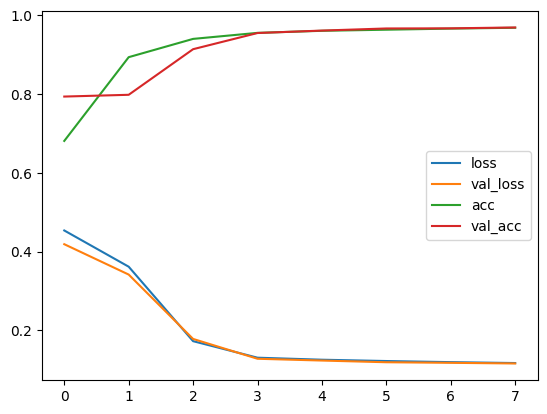

In [12]:
plot_history(r.history)

In [13]:
print(save_model('kitti_resnet', model))

model_kitti_resnet_1709061839.keras
